In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_score,recall_score

In [2]:
df = pd.read_csv('Data/train.csv')

## Data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## EDA

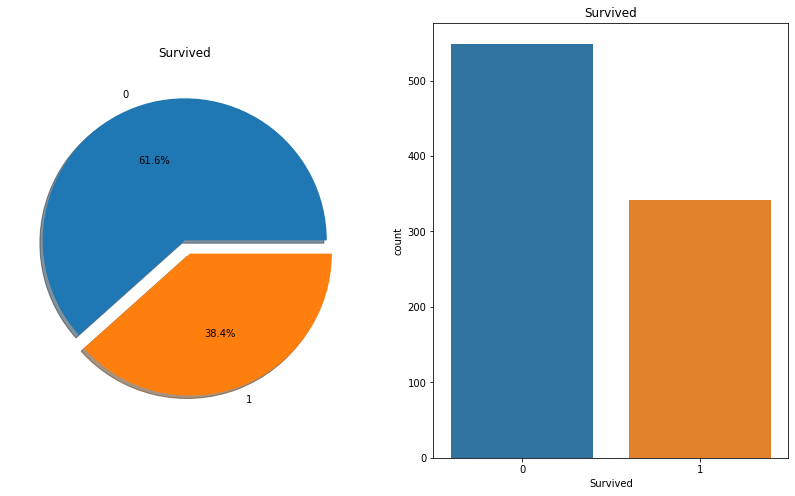

In [8]:
f,ax=plt.subplots(1,2,figsize=(14,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

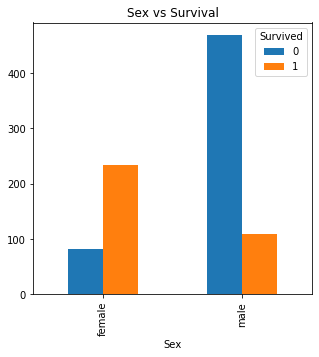

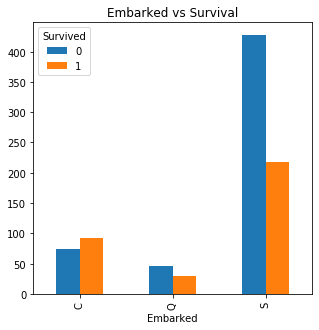

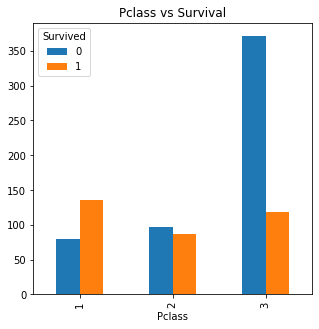

In [9]:
columns = ['Sex','Embarked','Pclass']

for i in columns:
    df.groupby([i, "Survived"]).size().unstack().plot(kind='bar', stacked=False, figsize=(5,5))
    plt.title('{} vs Survival'.format(i))
    plt.show()

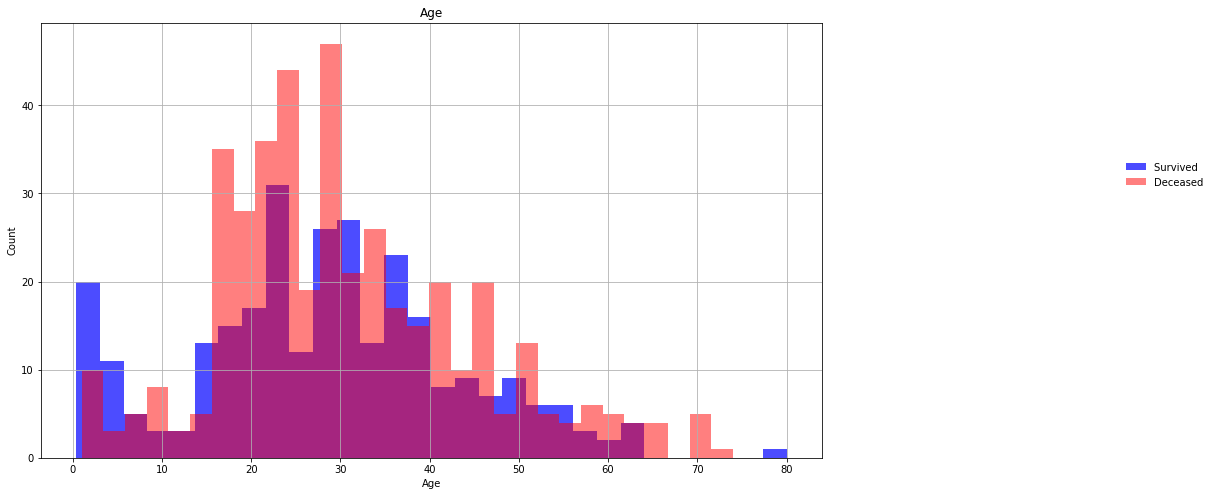

In [10]:
series = ['Age']
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
df[df.Survived == 1][series].hist(bins=30, color="blue", alpha=0.7, ax=ax)
df[df.Survived == 0][series].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.legend(labels =['Survived ', 'Deceased'], frameon=False, bbox_to_anchor=(1.5,0.7))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

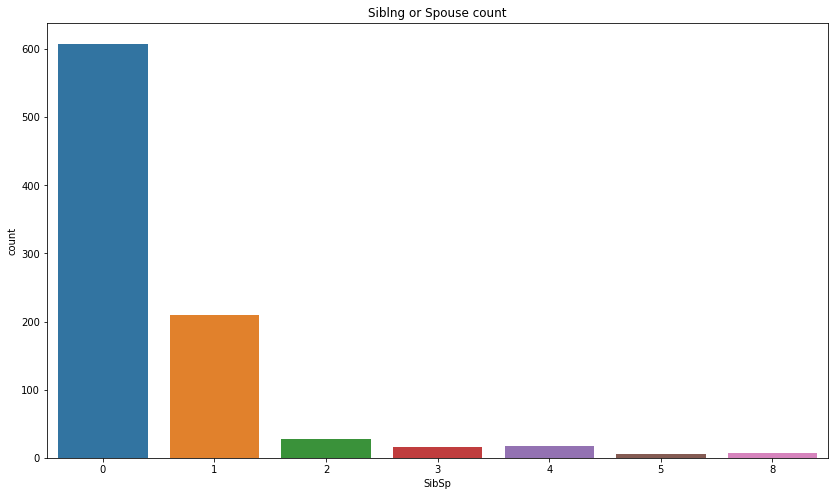

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.countplot(x='SibSp',data = df)
plt.title('Siblng or Spouse count')
plt.show()

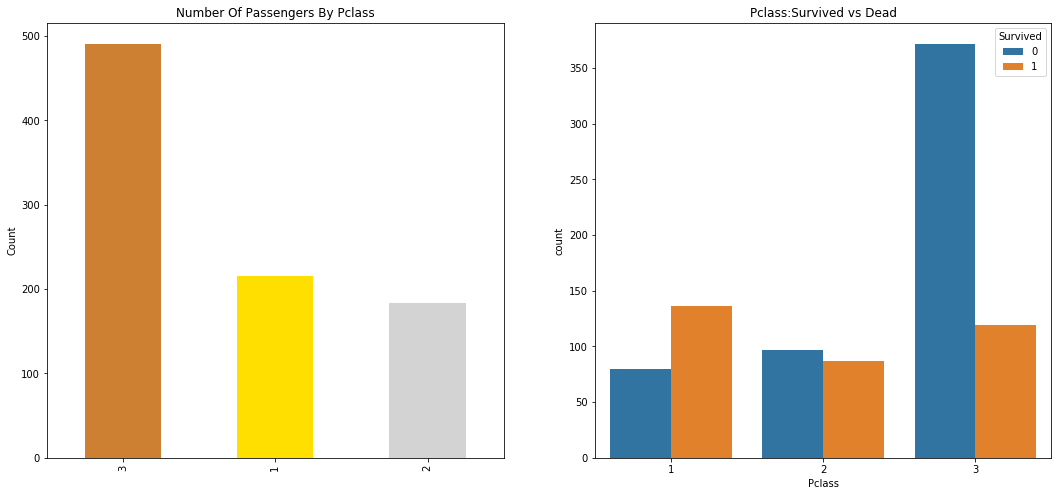

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

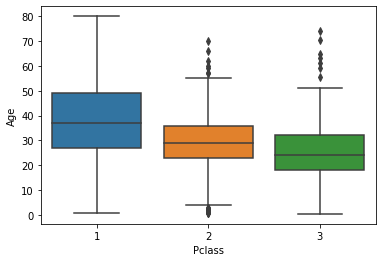

In [13]:
sns.boxplot(x='Pclass', y= 'Age', data = df)
plt.show()

## Missing Values(Imputing)

In [14]:
df['Age'] = df.groupby("Pclass").Age.transform(
    lambda x: x.fillna(x.mean())).round()

In [15]:
df.drop(['Cabin'], axis=1, inplace = True)

In [16]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())

In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Dummying Variables

In [18]:
dummying = ['Sex','Embarked']
new_data = pd.get_dummies(df, columns=dummying, drop_first=True)
new_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


## Models 

In [19]:
exclude = ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket']

# exclude = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Embarked']

## Train Test Split

In [20]:
X =new_data.drop(exclude, axis=1)
y = new_data['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training and Prediciting 

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [23]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred = logreg.predict(X_test)

In [25]:
logreg.score(X_test,y_test)

0.7649253731343284

In [26]:
# logreg.predict_proba(X_test)

## Accuracy

In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f. ' % accuracy_score(y_test, y_pred))

The Score is 0.7649. 


## Precision

In [28]:
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.782608695652174


## Recall

In [29]:
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.6260869565217392


## Confusion Matrix

In [30]:
array = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(array,columns=['Actual Survived','Actual Dead'],index=['Predicted Survived','Predicted Dead'])
conf_mat

,Actual Survived,Actual Dead
Predicted Survived,133,20
Predicted Dead,43,72


[[ 72  43]
 [ 20 133]]


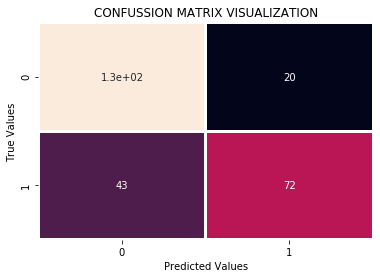

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred,labels=[1,0]))
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

## ROC

In [32]:
y_proba_logistic = logreg.predict_proba(X_test)

In [33]:
def roc_auc(prediction,model):
    fpr, tpr, thresholds = metrics.roc_curve(y_test,prediction)
    auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic '+str(model))
    plt.plot(fpr, tpr, color='blue', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'--',color='red')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

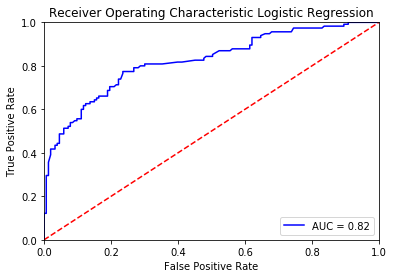

In [34]:
roc_auc(y_proba_logistic[:, 1],'Logistic Regression')

## Jaccard Index

In [35]:
from sklearn.metrics import jaccard_score
j_index = jaccard_score(y_true=y_test,y_pred=y_pred)
round(j_index,2)

0.53